In [1]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [2]:
#abrimos las matrices de adyacencia por amistad.
Friendship1  = np.loadtxt('friendship1.txt') 
Friendship2  = np.loadtxt('friendship2.txt') 
Friendship3  = np.loadtxt('friendship3(copia).txt')

In [3]:
F1=np.matrix(Friendship1)
F2=np.matrix(Friendship2)
F3=np.matrix(Friendship3)

In [4]:
imalos=[]
for i in range(160):
    if 1.0*(F1[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F2[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F3[i,:]==10).sum()==160:
        imalos.append(i)

In [5]:
160-len(list(set(imalos)))

134

In [6]:
malos=list(set(imalos))
malos=np.sort(malos)

In [7]:
F1=np.delete(F1, malos, axis=0)
F1=np.delete(F1,malos,axis=1)
F2=np.delete(F2, malos, axis=0)
F2=np.delete(F2,malos,axis=1)
F3=np.delete(F3, malos, axis=0)
F3=np.delete(F3,malos,axis=1)

# Con o sin peso por amistades

In [58]:
f1=F1.copy()
f1_sin_peso=(f1==0)==False
f1_sin_peso=np.where(f1_sin_peso==True,1,f1_sin_peso)
f2=F2.copy()
f2_sin_peso=(f2==0)==False
f2_sin_peso=np.where(f2_sin_peso==True,1,f2_sin_peso)
f3=F3.copy()
f3_sin_peso=(f3==0)==False
f3_sin_peso=np.where(f3_sin_peso==True,1,f3_sin_peso)


In [59]:
g1=F1.copy()
g1_=(g1==1)
g1_=np.where(g1_==True,1,g1_)
g1__=(g1==2)
g1__=np.where(g1__==True,0.8,g1__)
f1_con_peso=g1_+g1__

g2=F2.copy()
g2_=(g2==1)
g2_=np.where(g2_==True,1,g2_)
g2__=(g2==2)
g2__=np.where(g2__==True,0.8,g2__)
f2_con_peso=g2_+g2__

g3=F3.copy()
g3_=(g3==1)
g3_=np.where(g3_==True,1,g3_)
g3__=(g3==2)
g3__=np.where(g3__==True,0.8,g3__)
f3_con_peso=g3_+g3__

In [72]:
f1_con_peso[121,121]

0.8

# Armo las redes sin peso

In [60]:
G1=nx.from_numpy_matrix(f1_sin_peso,create_using=nx.DiGraph())
G2=nx.from_numpy_matrix(f2_sin_peso,create_using=nx.DiGraph())
G3=nx.from_numpy_matrix(f3_sin_peso,create_using=nx.DiGraph())

G1_p=nx.from_numpy_matrix(f1_con_peso,create_using=nx.DiGraph())
G2_p=nx.from_numpy_matrix(f2_con_peso,create_using=nx.DiGraph())
G3_p=nx.from_numpy_matrix(f3_con_peso,create_using=nx.DiGraph())


In [50]:
#VERIFICO QUE LOS ENLACES ESTÉN PESADOS
for i in range(100):
    print(nx.MultiDiGraph.get_edge_data(G1_p,list(G1.edges())[i][0],list(G1_p.edges())[i][1]))

# Exporto las redes para GEPHI

In [61]:
nx.write_gexf(G1,'1sinpeso.gexf')
nx.write_gexf(G2,'2sinpeso.gexf')
nx.write_gexf(G3,'3sinpeso.gexf')
nx.write_gexf(G1_p,'1conpeso.gexf')
nx.write_gexf(G2_p,'2conpeso.gexf')
nx.write_gexf(G3_p,'3conpeso.gexf')

# Visualización

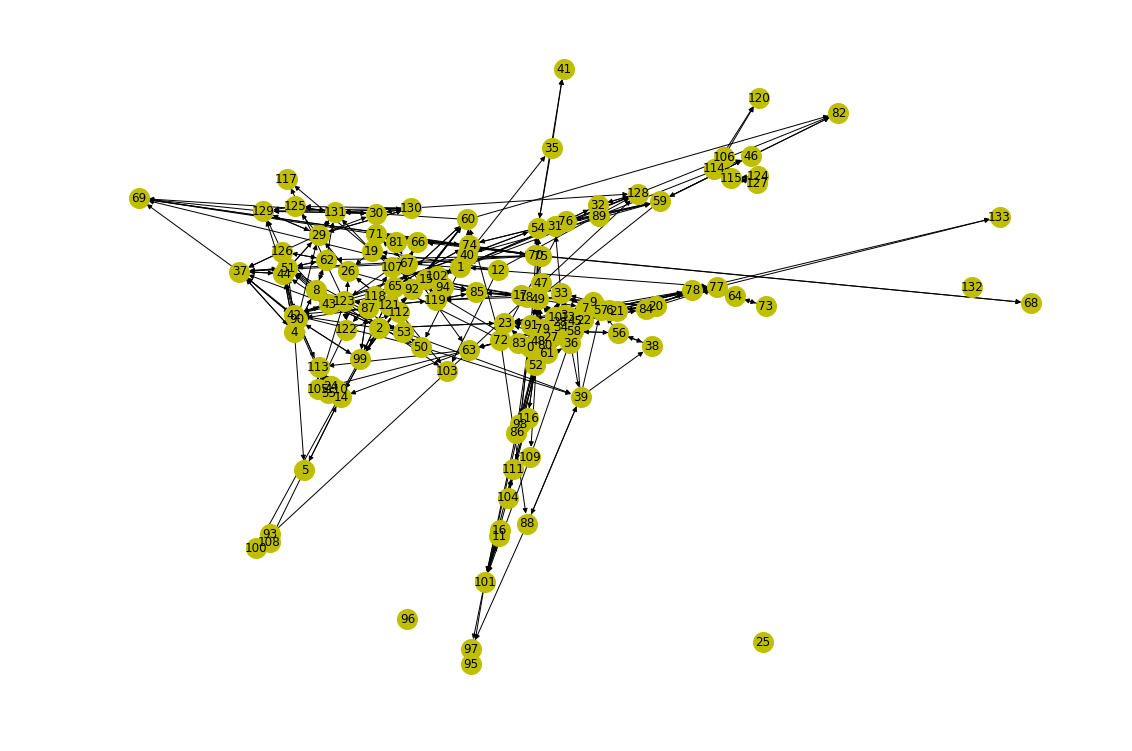

In [27]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G1) 
        
nx.draw(G1,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

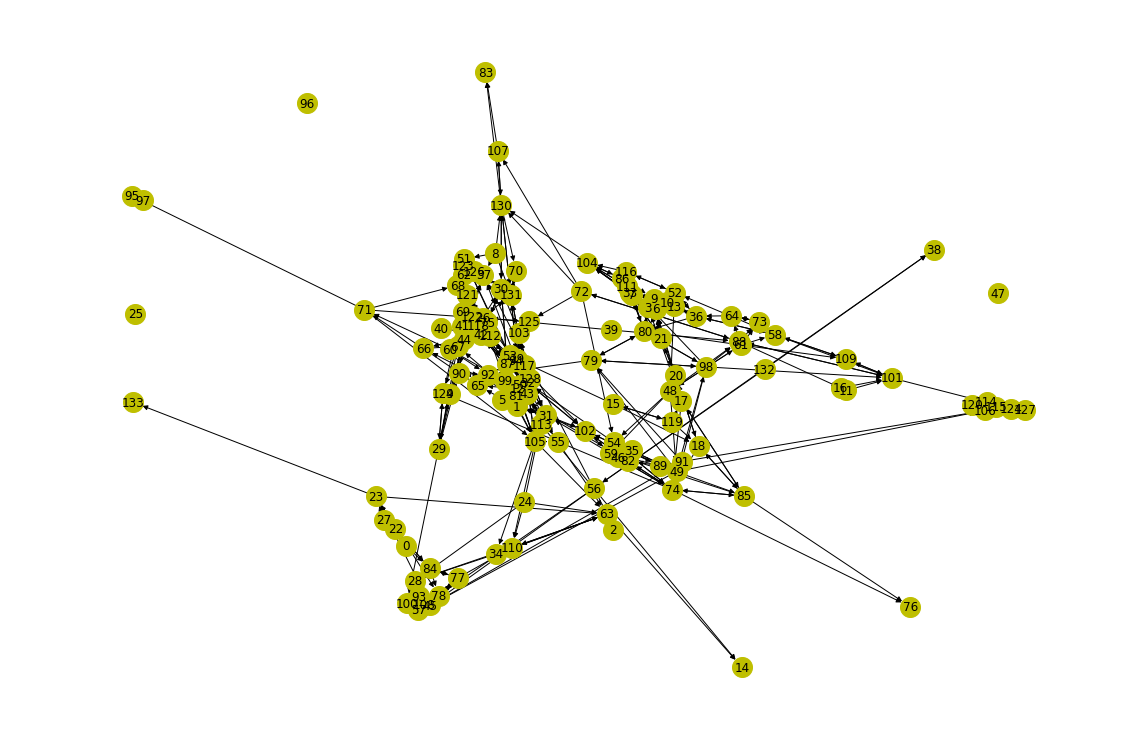

In [37]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(g2) 
        
nx.draw(g2,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

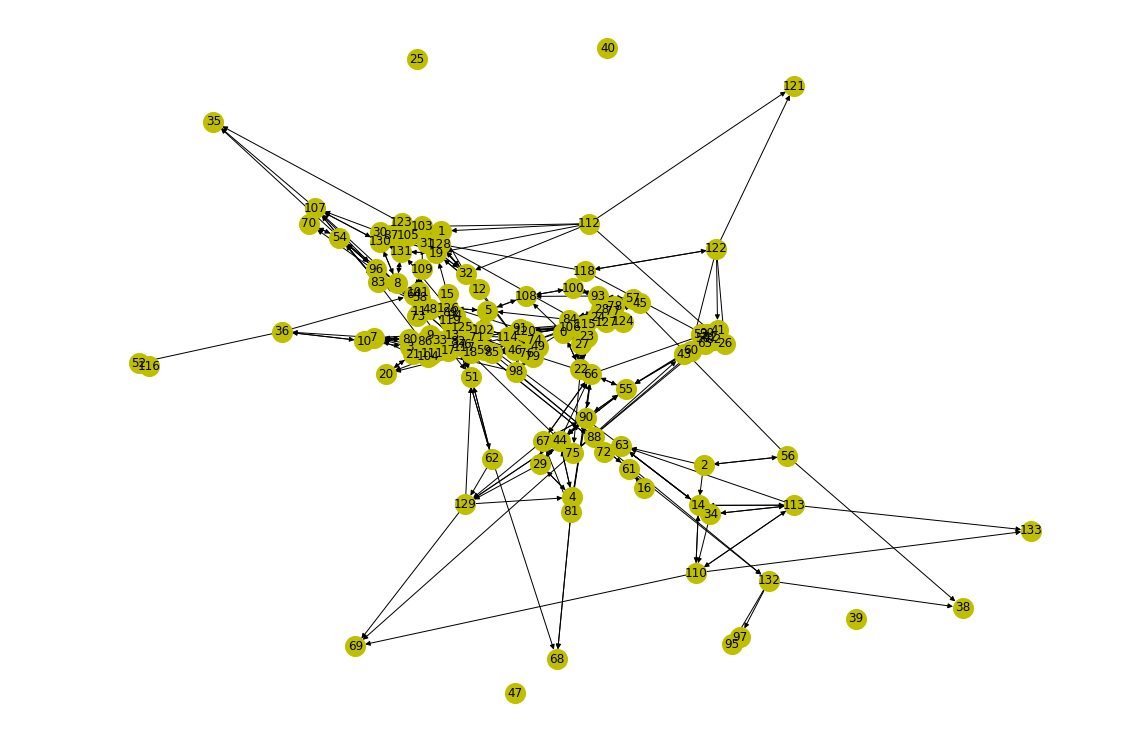

In [68]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(g3) 
        
nx.draw(g3,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

# In-Degree

In [83]:
max_g1_in=np.max(list(dict(g1.in_degree()).values()))
mean_g1_in=np.mean(list(dict(g1.in_degree()).values()))
max_g2_in=np.max(list(dict(g2.in_degree()).values()))
mean_g2_in=np.mean(list(dict(g2.in_degree()).values()))
max_g3_in=np.max(list(dict(g3.in_degree()).values()))
mean_g3_in=np.mean(list(dict(g3.in_degree()).values()))
print('Max in degree 1:', max_g1_in,'Mean in degree 1:',mean_g1_in,'Max in degree 2:',max_g2_in,'Mean in degree 2:',mean_g2_in,'Max in degree 3:',max_g3_in,'Mean in degree 3:',mean_g3_in)

Max in degree 1: 11 Mean in degree 1: 3.470149253731343 Max in degree 2: 10 Mean in degree 2: 3.417910447761194 Max in degree 3: 10 Mean in degree 3: 3.656716417910448


# Clustering

In [ ]:
Number of nodes year 1= 134
number of edges year 1=465